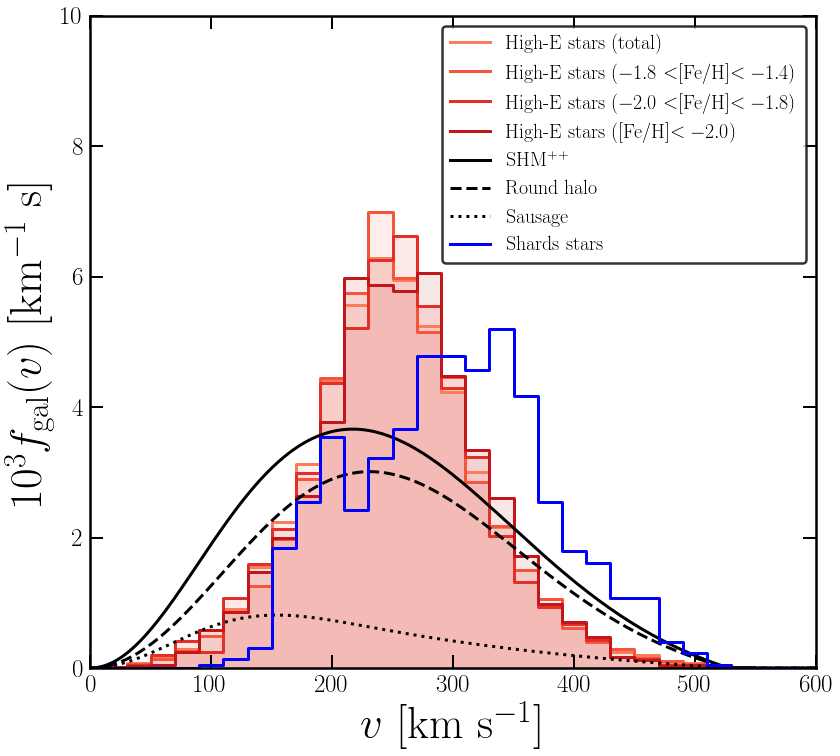

In [193]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#######

# Smooth components
n = 300
v = linspace(0.01,850.0,n)
v0 = SHMpp.RotationSpeed
v_esc = SHMpp.EscapeSpeed
sig_beta = SHMpp.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)
eta = 0.2
SCO = True
fv_Iso_gal = SpeedDist_Triaxial(v,0,sig_iso,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_gal = SpeedDist_Triaxial(v,0,sig_beta,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_gal + eta*fv_Saus_gal


nbins = 30


# Shards
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
all_names = df_S.group_id.unique()
vv = sqrt((df_S.GalRVel)**2.0+(df_S.GalTVel)**2.0+(df_S.GalzVel)**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,600))
vc = (vbins[1:]+vbins[0:-1])/2
     


def speeds(dfc):
    return sqrt((dfc.GalRVel)**2.0+(dfc.GalphiVel)**2.0+(dfc.GalzVel)**2.0)
    
def velocities(dfc):
    vx = dfc.GalRVel
    vy = dfc.GalphiVel
    vz = dfc.GalzVel
    return vx,vy,vz

df_highE = pandas.read_csv('../data/Gaia-SDSS_highE.csv')
df_feh1 = df_highE.loc[(df_highE['feh'] < -1.4)&(df_highE['feh'] > -1.8)]
df_feh2 = df_highE.loc[(df_highE['feh'] < -1.8)&(df_highE['feh'] > -2.0)]
df_feh3 = df_highE.loc[(df_highE['feh'] < -2.0)]
df_close = df_highE.loc[(df_highE['helio_dist'] < 2000.0)]


h_highE,_ = histogram(speeds(df_highE),bins=nbins,normed=True,range=(0,600))
h_feh1,_ = histogram(speeds(df_feh1),bins=nbins,normed=True,range=(0,600))
h_feh2,_ = histogram(speeds(df_feh2),bins=nbins,normed=True,range=(0,600))
h_feh3,_ = histogram(speeds(df_feh3),bins=nbins,normed=True,range=(0,600))
h_close,_ = histogram(speeds(df_close),bins=nbins,normed=True,range=(0,600))

#h_feh1 *= (shape(df_feh1)[0])/(1.0*shape(df_highE)[0])
#h_feh2 *= (shape(df_feh2)[0])/(1.0*shape(df_highE)[0])
#h_feh3 *= (shape(df_feh3)[0])/(1.0*shape(df_highE)[0])



# PLOT


xlab = r"$v$ [km s$^{-1}$]"
ylab1 = r"$10^3 f_{\rm gal}(v)$ [km$^{-1}$ s]"

fig,ax = MySquarePlot(xlab,ylab1)

col_ex = (cm.Reds(linspace(0,1,10)))
coff = 4
plt.fill_between(vc,1e3*h_highE,y2=0,color=col_ex[0+coff,:],lw=None,alpha=0.1,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_feh1,y2=0,color=col_ex[1+coff,:],lw=None,alpha=0.1,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_feh2,y2=0,color=col_ex[2+coff,:],lw=None,alpha=0.1,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_feh3,y2=0,color=col_ex[3+coff,:],lw=None,alpha=0.1,step='pre',zorder=0)

plt.step(vc,1e3*h_highE,'-',color=col_ex[0+coff,:],lw=3,label=r'High-E stars (total)')
plt.step(vc,1e3*h_feh1,'-',color=col_ex[1+coff,:],lw=3,label=r'High-E stars ($-1.8<$[Fe/H]$<-1.4$)')
plt.step(vc,1e3*h_feh2,'-',color=col_ex[2+coff,:],lw=3,label=r'High-E stars ($-2.0<$[Fe/H]$<-1.8$)')
plt.step(vc,1e3*h_feh3,'-',color=col_ex[3+coff,:],lw=3,label=r'High-E stars ([Fe/H]$<-2.0$)')


plt.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
plt.plot(v,1e3*(1-eta)*fv_Iso_gal,'k--',lw=3,label='Round halo')
plt.plot(v,1e3*eta*fv_Saus_gal,'k:',lw=3,label='Sausage')
plt.step(vc,1e3*h_shards,'-',color='b',lw=3,label='Shards stars')



# Legend lines
leg = plt.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
 
plt.xlim([0,600])
ax.set_ylim(bottom=0.0,top=10.)

# Save figure
plt.show()
pltname = 'HighE_fv_feh'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

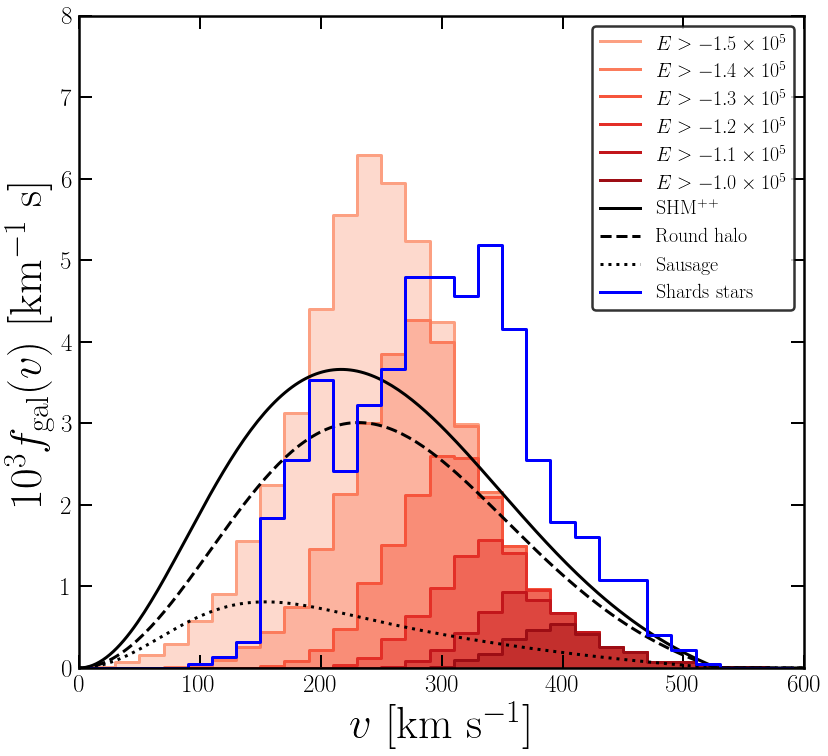

In [195]:

df_E0 = df_highE.loc[(df_highE['E'] > -1.4e5)]
df_E1 = df_highE.loc[(df_highE['E'] > -1.3e5)]
df_E2 = df_highE.loc[(df_highE['E'] > -1.2e5)]
df_E3 = df_highE.loc[(df_highE['E'] > -1.1e5)]
df_E4 = df_highE.loc[(df_highE['E'] > -1.0e5)]

h_E0,_ = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,600))
h_E1,_ = histogram(speeds(df_E1),bins=nbins,normed=True,range=(0,600))
h_E2,_ = histogram(speeds(df_E2),bins=nbins,normed=True,range=(0,600))
h_E3,_ = histogram(speeds(df_E3),bins=nbins,normed=True,range=(0,600))
h_E4,_ = histogram(speeds(df_E4),bins=nbins,normed=True,range=(0,600))

h_E0 *= (shape(df_E0)[0])/(1.0*shape(df_highE)[0])
h_E1 *= (shape(df_E1)[0])/(1.0*shape(df_highE)[0])
h_E2 *= (shape(df_E2)[0])/(1.0*shape(df_highE)[0])
h_E3 *= (shape(df_E3)[0])/(1.0*shape(df_highE)[0])
h_E4 *= (shape(df_E4)[0])/(1.0*shape(df_highE)[0])


# PLOT
xlab = r"$v$ [km s$^{-1}$]"
ylab1 = r"$10^3 f_{\rm gal}(v)$ [km$^{-1}$ s]"

fig,ax = MySquarePlot(xlab,ylab1)

col_ex = (cm.Reds(linspace(0,1,10)))
coff = 3

plt.fill_between(vc,1e3*h_highE,y2=0,color=col_ex[0+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_E0,y2=0,color=col_ex[1+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_E1,y2=0,color=col_ex[2+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_E2,y2=0,color=col_ex[3+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_E3,y2=0,color=col_ex[4+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)
plt.fill_between(vc,1e3*h_E4,y2=0,color=col_ex[5+coff,:],lw=None,alpha=0.4,step='pre',zorder=0)

plt.step(vc,1e3*h_highE,'-',color=col_ex[0+coff,:],lw=3,label=r'$E>-1.5\times 10^{5}$')
plt.step(vc,1e3*h_E0,'-',color=col_ex[1+coff,:],lw=3,label=r'$E>-1.4\times 10^{5}$')
plt.step(vc,1e3*h_E1,'-',color=col_ex[2+coff,:],lw=3,label=r'$E>-1.3\times 10^{5}$')
plt.step(vc,1e3*h_E2,'-',color=col_ex[3+coff,:],lw=3,label=r'$E>-1.2\times 10^{5}$')
plt.step(vc,1e3*h_E3,'-',color=col_ex[4+coff,:],lw=3,label=r'$E>-1.1\times 10^{5}$')
plt.step(vc,1e3*h_E4,'-',color=col_ex[5+coff,:],lw=3,label=r'$E>-1.0\times 10^{5}$')


plt.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
plt.plot(v,1e3*(1-eta)*fv_Iso_gal,'k--',lw=3,label='Round halo')
plt.plot(v,1e3*eta*fv_Saus_gal,'k:',lw=3,label='Sausage')
plt.step(vc,1e3*h_shards,'-',color='b',lw=3,label='Shards stars')

# Legend lines
leg = plt.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
 

plt.xlim([0,600])
ax.set_ylim(bottom=0.0,top=8.)

# Save figure
plt.show()
pltname = 'HighE_fv_E'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

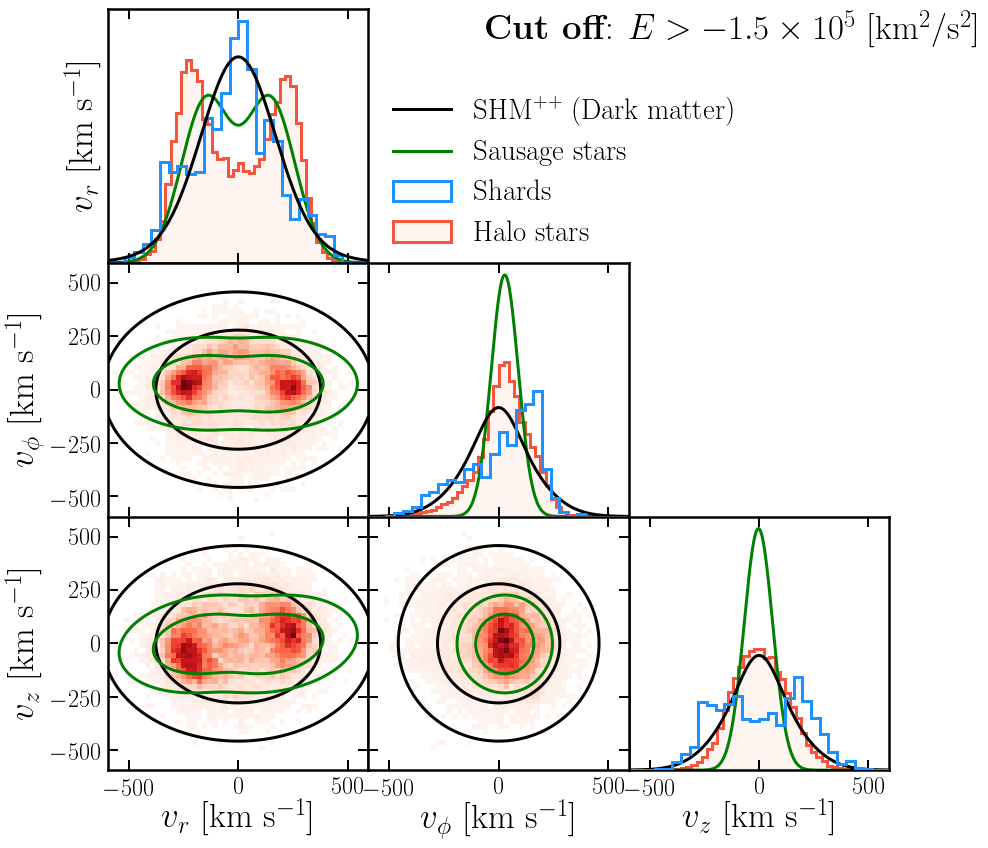

In [309]:
# DATA TO USE
from copy import copy


# vx,vy,vz = velocities(df_E4) 
# pltname = 'fv2D_highestE'
# txt = r'{\bf Cut off}: $E>-1.0\times 10^5$ [km$^2$/s$^2$]'
# cmap = 'YlOrRd'
# col_ex = (cm.YlOrRd(linspace(0,1,10)))
# nbins_1D = 20
# nbins_2D = 20

# vx,vy,vz = velocities(df_E2) 
# pltname = 'fv2D_midE'
# txt = r'{\bf Cut off}: $E>-1.2\times 10^5$ [km$^2$/s$^2$]'
# cmap = 'OrRd'
# col_ex = (cm.OrRd(linspace(0,1,10)))
# nbins_1D = 30
# nbins_2D = 30

vx,vy,vz = velocities(df_highE) 
pltname = 'fv2D_lowerE'
txt = r'{\bf Cut off}: $E>-1.5\times 10^5$ [km$^2$/s$^2$]'
cmap = 'Reds'
col_ex = (cm.Reds(linspace(0,1,10)))
nbins_1D = 50
nbins_2D = 50

col_edge = col_ex[5,:]
col_face = col_ex[0,:]

cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

# INPUT PLOT
vmin=-595.0
vmax=595.0
nfine=500
levels=[-6.2,-2.3,0]
#levels = [-2.3,0]
tit_fontsize=30
col_an = 'k'
point_size = 8
lblsize = 31
xlblsize = 35
def_alph = 0.2
col_shards = 'dodgerblue'

vfine = linspace(vmin,vmax,nfine)
V1,V2 = meshgrid(vfine,vfine)


def fv_1D_an(vfine,sig,i):
    sig0_sq = sig[i]**2.0
    Norm = (1.0/sqrt(2*pi*sig0_sq))
    fv = Norm*exp(-vfine**2.0/(2*sig0_sq))
    fv /= trapz(fv,vfine)
    return fv


sig1 = 113.0
sig2 = 61.9
sig3 = 65.2
sig12 = 0.0
sig23 = 0.0
sig13 = 0.18*sig1*sig3
sig_Saus_stars = array([[sig1**2.0,sig12,sig13],[sig12,sig2**2.0,sig23],[sig13,sig23,sig3**2.0]])
mu1 = array([147.6,27.9,-2.8])
mu2 = array([-147.6,27.9,-2.8])
def fv_1D_saus(vfine,i):
    U = linalg.inv(sig_Saus_stars)
    U0 = U[i,i]
    V = U[i,:]    
    V = delete(V, i, axis=0)
    W = delete(U, i, axis=0)
    W = delete(W, i, axis=1)
    U = U0 - linalg.multi_dot([V, linalg.inv(W), V.T])
    fv = exp(-0.5*(vfine-mu1[i])*U*(vfine-mu1[i]))
    fv += exp(-0.5*(vfine-mu2[i])*U*(vfine-mu2[i]))
    fv /= trapz(fv,vfine)
    return fv

def fv_2D_saus(V1,V2,i,j):
    U = linalg.inv(sig_Saus_stars)
    U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
    V = vstack((U[i,:],U[j,:]))    
    V = delete(V, (i,j), axis=1)
    W = delete(U, (i,j), axis=0)
    W = delete(W, (i,j), axis=1)
    Uoff = linalg.multi_dot([V, linalg.inv(W), V.T])
    Ut = U0-Uoff
    Norm = (1.0/sqrt(2*pi))*sqrt(linalg.det(W)) 
    fv = (Norm/2)*exp(-0.5*((V1-mu1[i])**2.0*Ut[0,0]+(V2-mu1[j])**2.0*Ut[1,1]+2*(V1-mu1[i])*(V2-mu1[j])*Ut[1,0]))  
    fv += (Norm/2)*exp(-0.5*((V1-mu2[i])**2.0*Ut[0,0]+(V2-mu2[j])**2.0*Ut[1,1]+2*(V1-mu2[i])*(V2-mu2[j])*Ut[1,0]))  
    fv = log(fv)
    fv = fv-amax(fv)
    return fv

def fv_2D_an(V1,V2,sig,i,j):
    U = diag(1.0/sig**2.0)
    U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
    V = vstack((U[i,:],U[j,:]))    
    V = delete(V, (i,j), axis=1)
    W = delete(U, (i,j), axis=0)
    W = delete(W, (i,j), axis=1)
    Uoff = linalg.multi_dot([V, linalg.inv(W), V.T])
    Ut = U0-Uoff
    Norm = (1.0/sqrt(2*pi))*sqrt(linalg.det(W)) 
    fv = Norm*exp(-0.5*(V1**2.0*Ut[0,0]+V2**2.0*Ut[1,1]+2*V1*V2*Ut[1,0]))  
    fv = log(fv)
    fv = fv-amax(fv)
    return fv



# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(3, 3,figsize=(14,14))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.0,hspace=0.0)
ax_x = plt.subplot(gs[0,0])
ax_y = plt.subplot(gs[1,1])
ax_z = plt.subplot(gs[2,2])

ax_yx = plt.subplot(gs[1,0])
ax_zx = plt.subplot(gs[2,0])
ax_zy = plt.subplot(gs[2,1])

fig.delaxes(plt.subplot(gs[0,1]))
fig.delaxes(plt.subplot(gs[0,2]))
fig.delaxes(plt.subplot(gs[1,2]))

# 1D plots
ax_x.plot(vfine,(1-eta)*fv_1D_an(vfine,sig_iso,0)+eta*fv_1D_an(vfine,sig_beta,0),'-',linewidth=3,color=col_an,label=r'SHM$^{++}$ (Dark matter)',zorder=5)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1,label=None)
ax_x.hist(vxS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1,label=None)
ax_x.fill_between([-900,-900],[0.0001,0.0001],lw=3,edgecolor=col_edge,facecolor=col_face,label=r'Halo stars')
ax_x.plot(vfine,fv_1D_saus(vfine,0),'g-',lw=3,label=r'Sausage stars')
ax_x.set_ylabel(r'$v_r$ [km s$^{-1}$]',fontsize=xlblsize)
ax_x.legend(fontsize=lblsize-2,frameon=False,bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)

ax_y.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1)
ax_y.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1)
ax_y.hist(vyS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
ax_y.plot(vfine,fv_1D_saus(vfine,1),'g-',lw=3)
ax_y.plot(vfine,(1-eta)*fv_1D_an(vfine,sig_iso,1)+eta*fv_1D_an(vfine,sig_beta,1),'-',linewidth=3,color=col_an)

ax_z.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1)
ax_z.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1)
ax_z.hist(vzS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
ax_z.plot(vfine,fv_1D_saus(vfine,2),'g-',lw=3)
ax_z.plot(vfine,eta*fv_1D_an(vfine,sig_beta,2)+(1-eta)*fv_1D_an(vfine,sig_iso,2),'-',linewidth=3,color=col_an)

ax_z.set_xlabel(r'$v_z$ [km s$^{-1}$]',fontsize=xlblsize)


# 2D plots
ax_yx.hist2d(vx,vy,range=((vmin,vmax),(vmin,vmax)),bins=nbins_2D,cmap=cmap,vmin=0.001)
#ax_yx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_iso,0,1),levels=levels,colors=col_an,linewidths=3,linestyles='solid')
#ax_yx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_beta,0,1),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')
ax_yx.contour(vfine,vfine,(1-eta)*fv_2D_an(V1,V2,sig_iso,0,1)+eta*fv_2D_an(V1,V2,sig_beta,0,1),levels=levels,colors=col_an,linewidths=3,linestyles='solid')
ax_yx.contour(vfine,vfine,fv_2D_saus(V1,V2,0,1),levels=levels,colors='g',linewidths=3,linestyles='solid')
ax_yx.set_ylabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=xlblsize)

ax_zx.hist2d(vx,vz,range=((vmin,vmax),(vmin,vmax)),bins=nbins_2D,cmap=cmap,vmin=0.001)
ax_zx.contour(vfine,vfine,(1-eta)*fv_2D_an(V1,V2,sig_iso,0,2)+eta*fv_2D_an(V1,V2,sig_beta,0,2),levels=levels,colors=col_an,linewidths=3,linestyles='solid')
ax_zx.contour(vfine,vfine,fv_2D_saus(V1,V2,0,2),levels=levels,colors='g',linewidths=3,linestyles='solid')
ax_zx.set_xlabel(r'$v_r$ [km s$^{-1}$]',fontsize=xlblsize)
ax_zx.set_ylabel(r'$v_z$ [km s$^{-1}$]',fontsize=xlblsize)

H = ax_zy.hist2d(vy,vz,range=((vmin,vmax),(vmin,vmax)),bins=nbins_2D,cmap=cmap,vmin=0.001)
ax_zy.contour(vfine,vfine,fv_2D_saus(V1,V2,1,2),levels=levels,colors='g',linewidths=3,linestyles='solid')
ax_zy.contour(vfine,vfine,(1-eta)*fv_2D_an(V1,V2,sig_iso,1,2)+eta*fv_2D_an(V1,V2,sig_beta,1,2),levels=levels,colors=col_an,linewidths=3,linestyles='solid')
ax_zy.set_xlabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=xlblsize)

# Tick params
ax_x.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_y.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_z.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_zx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_yx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_zy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)

plt.gcf().text(0.5,0.85,txt,fontsize=35)

ax_yx.set_xlim([vmin,vmax])
ax_yx.set_ylim([vmin,vmax])
ax_zx.set_xlim([vmin,vmax])
ax_zx.set_ylim([vmin,vmax])
ax_zy.set_xlim([vmin,vmax])
ax_zy.set_ylim([vmin,vmax])
ax_x.set_xlim([vmin,vmax])
ax_y.set_xlim([vmin,vmax])
ax_z.set_xlim([vmin,vmax])
ax_x.set_yticks([])
ax_y.set_yticks([])
ax_z.set_yticks([])
ax_x.set_yticklabels([])
ax_x.set_xticklabels([])
ax_y.set_yticklabels([])
ax_y.set_xticklabels([])
ax_z.set_yticklabels([])
ax_yx.set_xticklabels([])
ax_zy.set_yticklabels([])






plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

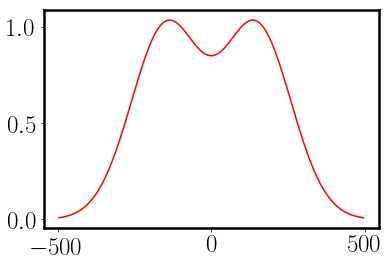

In [296]:
sig1 = 113.0
sig2 = 61.9
sig3 = 65.2
sig12 = 0.0
sig23 = 0.0
sig13 = 0.18*sig1*sig3
sig_Saus_stars = array([[sig1**2.0,sig12,sig13],[sig12,sig2**2.0,sig23],[sig13,sig23,sig3**2.0]])
mu1 = array([147.6,27.9,2.8])
mu2 = array([-147.6,27.9,2.8])
i = 0
U = linalg.inv(sig_Saus_stars)
U0 = U[i,i]
V = U[i,:]    
V = delete(V, i, axis=0)
W = delete(U, i, axis=0)
W = delete(W, i, axis=1)
U = U0 - linalg.multi_dot([V, linalg.inv(W), V.T])
fv = exp(-0.5*(vfine-mu1[i])*U*(vfine-mu1[i]))
fv += exp(-0.5*(vfine-mu2[i])*U*(vfine-mu2[i]))


plt.plot(vfine,fv,'r-')
plt.show()

/Users/ciaranohare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':



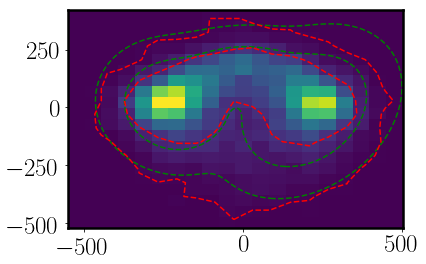

[ 0.40102207  0.41114756  0.18783036]
[-217.18735493  195.85471509  -11.41471127]


In [381]:
feh = df_highE.feh
vx,vy,vz = df_highE.GalRVel,df_highE.GalphiVel,df_highE.GalzVel
data = array([vx,vy,vz]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(data)

i = 0
j = 1

H1 = fv_2D(V1,V2,clf,i,j)
H2,vbins1,vbins2 = histogram2d(vx,vy,bins=20,range=((vmin,vmax),(vmin,vmax)),normed=True)
H2 = log(H2.T/amax(H2))
H2[H2==-inf] = -10000
plt.hist2d(vx,vy,bins=20)
plt.contour(vfine,vfine,H1,levels=[-5,-2,0],colors='g')
plt.contour((vbins1[1:]+vbins1[0:-1])/2,(vbins2[1:]+vbins2[0:-1])/2,H2,levels=[-5,-2,0],colors='r')

plt.show()

w = clf.weights_
print w
print clf.means_[:,0]

/Users/ciaranohare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log



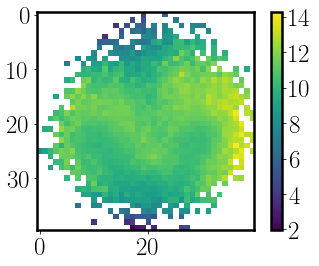

In [355]:
def fv_2D_full(V1,V2,clf,i,j):
    covs = clf.covariances_
    meens = clf.means_
    ws = clf.weights_
    fv = zeros(shape=shape(V1))
    if ndim(covs)>2:
        for k in range(0,shape(covs)[0]):
            U = squeeze(linalg.inv(covs[k,:,:]))
            v10 = meens[k,i]
            v20 = meens[k,j]
            U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
            V = vstack((U[i,:],U[j,:]))    
            V = delete(V, (i,j), axis=1)
            W = delete(U, (i,j), axis=0)
            W = delete(W, (i,j), axis=1)
            Uoff = linalg.multi_dot([V, linalg.inv(W), V.T])
            Ut = U0-Uoff
            V1o = V1-v10
            V2o = V2-v20
            Norm = 1.0
            fv += ws[k]*Norm*exp(-0.5*(V1o**2.0*Ut[0,0]+V2o**2.0*Ut[1,1]+2*V1o*V2o*Ut[1,0]))  
    return fv

H2,vbins1,vbins2 = histogram2d(vy,vx,bins=(40,40),normed=True)
vc1 = (vbins1[1:]+vbins1[0:-1])/2
vc2 = (vbins2[1:]+vbins2[0:-1])/2
Vc1,Vc2 = meshgrid(vc1,vc2)
H1 = fv_2D_full(Vc1,Vc2,clf,i,j)

plt.imshow(log(H1)-log(H2))
plt.colorbar()
plt.show()


/Users/ciaranohare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  



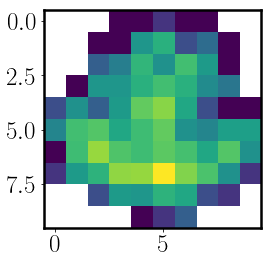

In [358]:
HS,_,_ = histogram2d(vyS,vxS,bins=(10,10),normed=True)
plt.imshow(log(HS))
plt.show()

In [160]:
E>-1.3e-5

False